# Importing Libraries and  dataset

libraries are called AND TITANIC dataset is imported 


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

os.chdir("D:\\datasets\\titanic")
df = pd.read_csv("train.csv")

df.head(11)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [2]:
dt = pd.read_csv("test.csv")

# Information of the dataset is retrieved

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Information regarding dependencies among them is retrieved

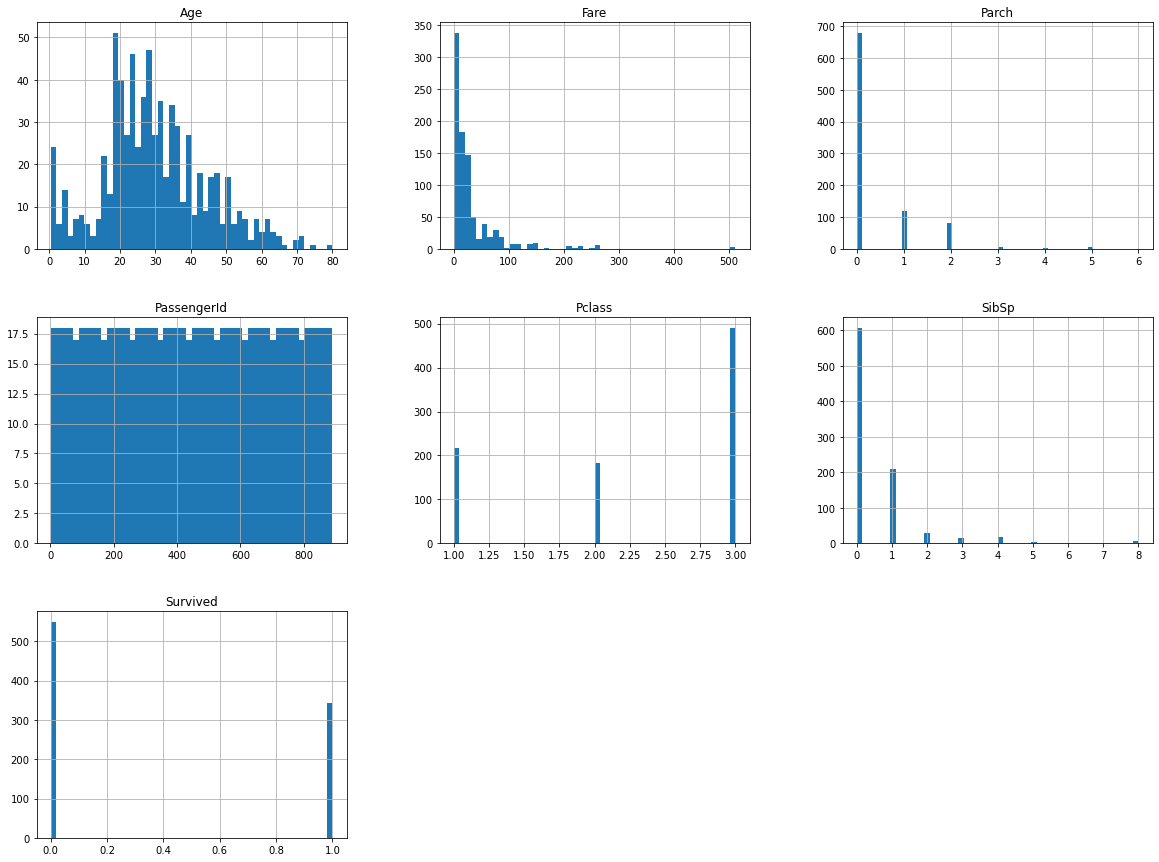

In [4]:
df.hist(bins=50, figsize=(20,15))
plt.show()

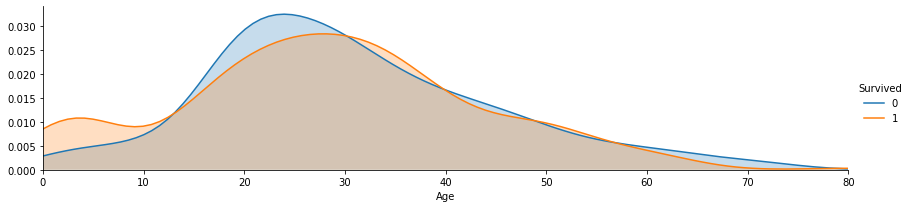

In [6]:
import seaborn as sns

fig = sns.FacetGrid(df, hue = 'Survived', aspect = 4)
fig.map(sns.kdeplot, 'Age' , shade = True)
fig.set(xlim = (0, df['Age'].max()))
fig.add_legend()

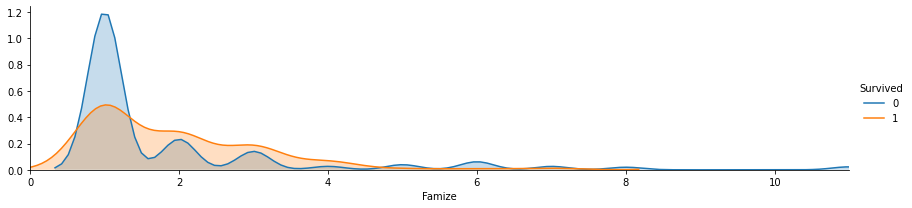

In [10]:
# Create a family size descriptor from SibSp and Parch
df["Famize"] = df["SibSp"] + df["Parch"] + 1

# Drop SibSp and Parch variables
df.drop(labels = ["SibSp",'Parch'], axis = 1, inplace = True)

# Viz the survival probabily of Famize feature

facet = sns.FacetGrid(df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Famize',shade= True)
facet.set(xlim=(0, df['Famize'].max()))
facet.add_legend()
plt.xlim(0);

The family size is inverse to the rate of survival i.e, higher the family size lower is the chance of survival


# Unimportant  information are dropped 

Name and Ticket number are denoted equal importance to class,because lets be honest a rich distinguised man wont just choose third class,
Cabin had too low number of non-null vaues and may lead to overfitting
Sex is removed to encode it into numerics
Similarly, Embarked is also done so, one of the class is removed to dummy variable trap.
Finally Age is imputed to fill the dataset

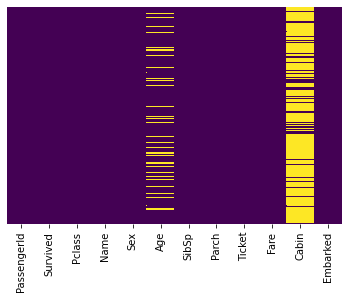

In [8]:
sns.heatmap(df.isnull(), cbar = False , 
            yticklabels = False , cmap = 'viridis')

A map showing the amount of data that is absent in the above dataset is shown in which it is seen that more than 75% of data goes missing in cabin so it can be moctly neglected


In [5]:

from sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()

df_n=encoder.fit_transform(df.Sex)

df_n.shape

(891,)

In [6]:
df["Sex_bin"]=df_n
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [7]:
dummies=pd.get_dummies(df.Embarked)
merge =pd.concat([df,dummies],axis="columns")

df_f=merge.drop(["Embarked","C"],axis=1)
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Sex_bin      891 non-null    int32  
 12  Q            891 non-null    uint8  
 13  S            891 non-null    uint8  
dtypes: float64(2), int32(1), int64(5), object(4), uint8(2)
memory usage: 81.9+ KB


In [8]:
df_r=df_f.drop(["Name","Ticket","Cabin","Sex"],axis=1)
df_r

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_bin,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1
888,889,0,3,NaN,1,2,23.4500,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,0


In [9]:
median=df["Age"].median()
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(strategy="median")

imputer.fit(df_r)
x=imputer.transform(df_r)
d=pd.DataFrame(x,columns=df_r.columns)
d.info()
X = d.iloc[:,2:].values
y = d.iloc[:, 1].values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    float64
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    float64
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    float64
 5   Parch        891 non-null    float64
 6   Fare         891 non-null    float64
 7   Sex_bin      891 non-null    float64
 8   Q            891 non-null    float64
 9   S            891 non-null    float64
dtypes: float64(10)
memory usage: 69.7 KB


In [10]:
X = d.iloc[:,2:].values
y = d.iloc[:, 1].values
X.shape

(891, 8)

# correlation of different aspects with the target(survived) set is corellated

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015726922188>,
      dtype=object)

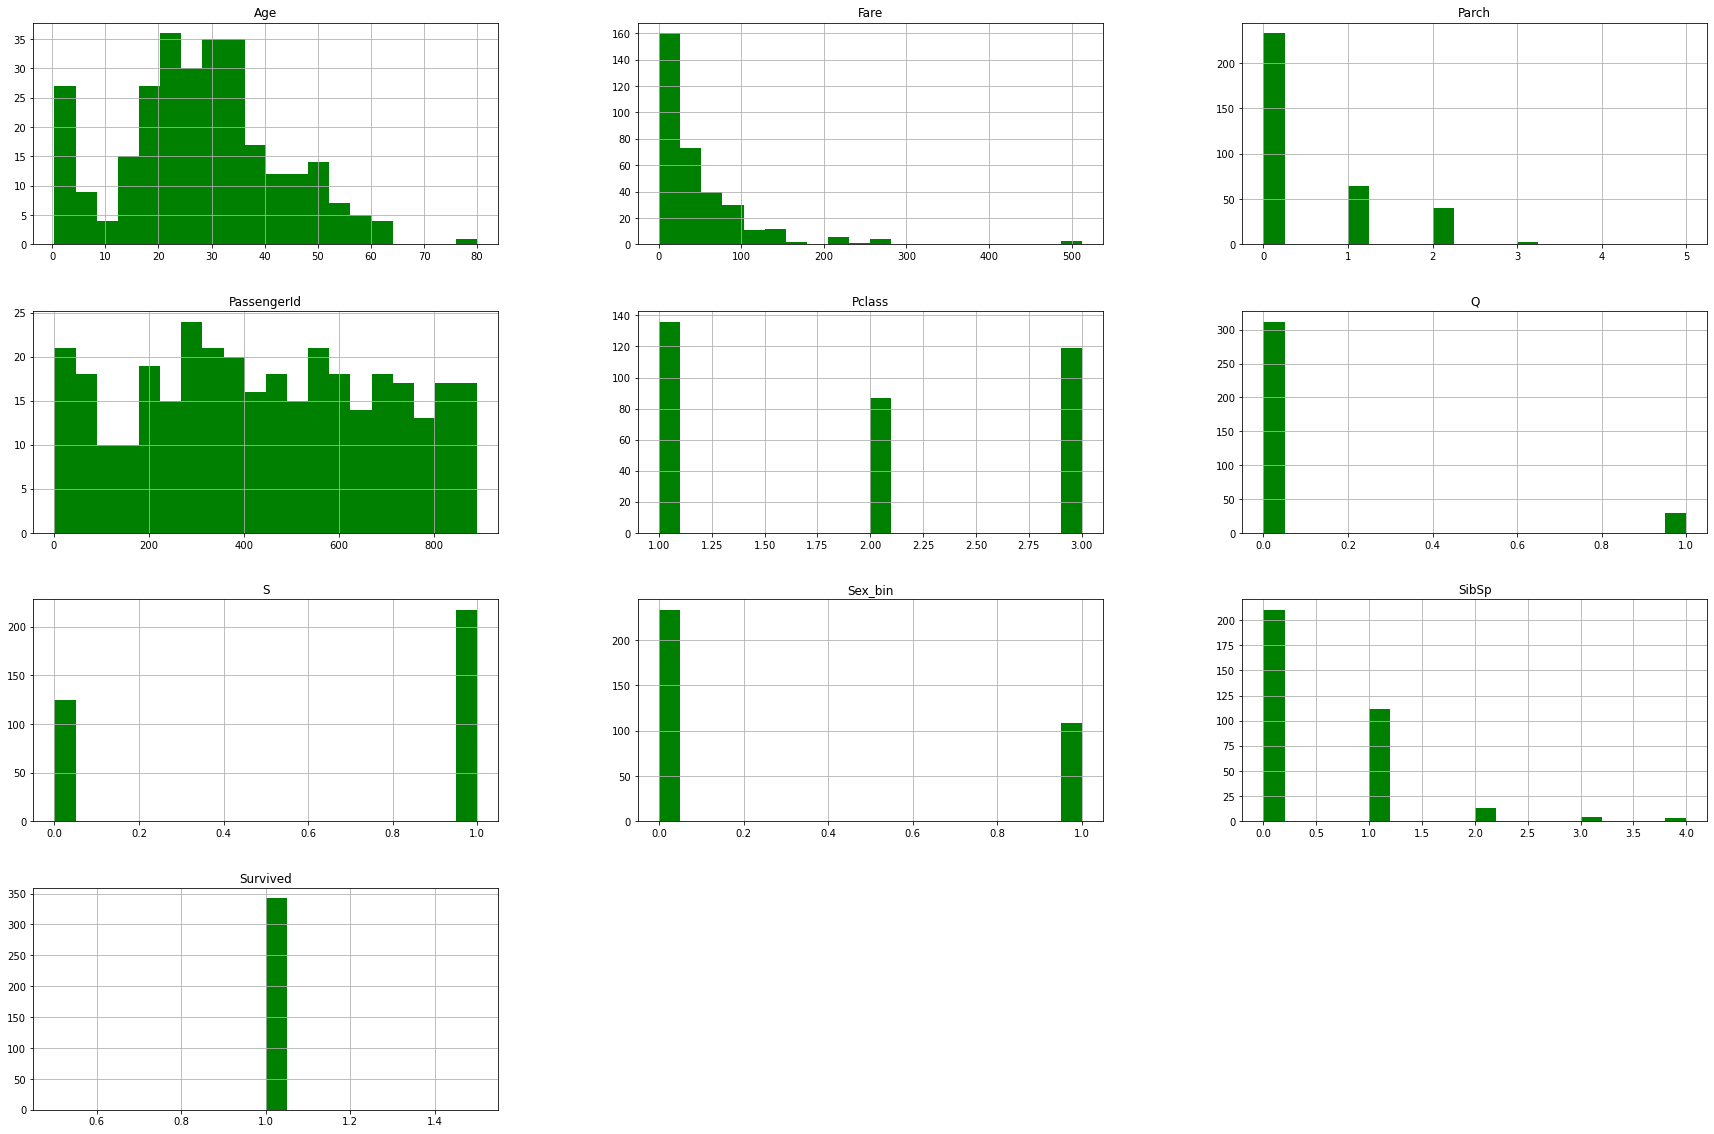

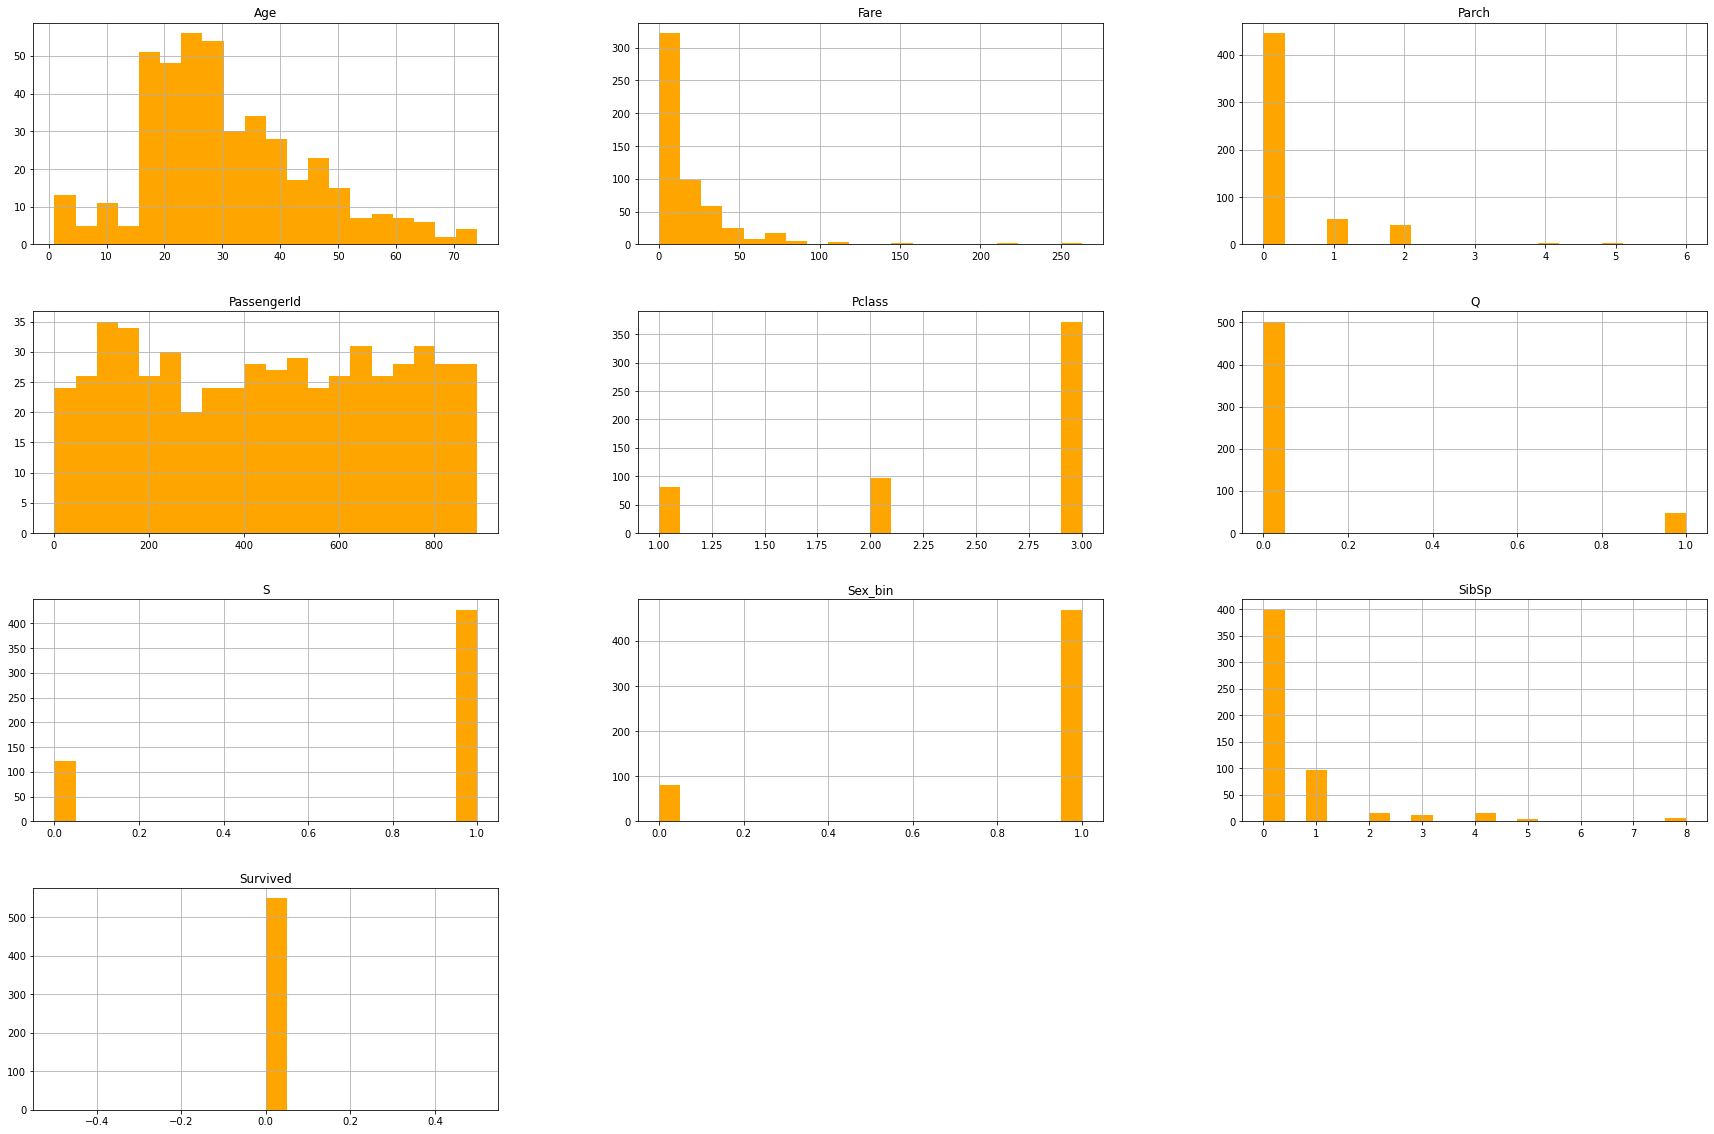

In [11]:

#plt.plot(df.Age,df.Survived,"g+")
re=df_r[df.Survived==1]
rd=df_r[df.Survived==0]
re.hist(bins=20,figsize=(30,20),color="green")
rd.hist(bins=20,figsize=(30,20),color="orange")
#

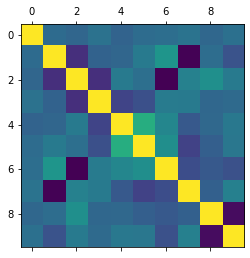

In [12]:
d_corr=d.corr()
d_corr['Survived'].sort_values(ascending=False)
plt.matshow(d_corr,)
plt.show()

# The best model with the predicted value along with the correlation matrix of the set is corellated with different aspects and finally with predicted and actual values

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from statistics import mode
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 67)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print(accuracy)

filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))
 

In [ ]:

yt_pred = model.predict(df_X)
yt_pred

In [ ]:
import pickle
filename='tmod'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
from sklearn.metrics import confusion_matrix
Y_pred=model.predict(X_test)
cr=confusion_matrix(y_test,Y_pred)
df_corr=df_r.corr()
df_corr['Survived'].sort_values(ascending=False)
plt.matshow(df_corr)
plt.show()

import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cr,annot=True)


# Different models are implemented to see the different prediction sand accuracies


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
X = d.iloc[:, [2,3,4,5,6,7]].values
y = d.iloc[:, 1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
classifier=GaussianNB()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
acc=accuracy_score(y_test, y_pred)
print(acc)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import NuSVC
X = d.iloc[:,2:7].values
y = d.iloc[:, 1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
classifier = NuSVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
X = d.iloc[:,2:7].values
y = d.iloc[:, 1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train) 
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
trials = 100
sum = 0
for i in range(trials):
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25)
    tree = DecisionTreeClassifier(max_depth=3)
    tree.fit(X_train, y_train)
    tree_acc = tree.score(X_valid, y_valid) * 100
    sum = sum + tree_acc
print("Average validation accuracy of",trials,"trials = ",sum/trials)

Average validation accuracy of 100 trials =  81.47533632286996


In [17]:
import pickle
filename='tmod'
pickle.dump(tree, open(filename, 'wb'))